<font size=5> Data Importation 📖 </font>

In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pathlib 
import random

In [3]:
path = '/content/drive/MyDrive/Dataset/'
data_dir = pathlib.Path(path)

<font size=5> Getting class names ♑︎ </font>

In [4]:
class_names = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_names

array([['Non_Demented', 'Very_Mild_Demented']], dtype='<U18')

<font size=5> Total number of images 💯 </font>

In [5]:
imageCount = len(list(data_dir.glob("*/*.jpg") ))
imageCount

5440

<font size=5> Example Image 📈 </font>

In [6]:
def plot(path,class_name):
    print(path)
    plt.figure(figsize=(8,8))
    
    img = plt.imread(path)
    
    plt.xticks([])
    plt.yticks([])
    plt.title("Class Name: "+class_name)
    plt.imshow(img)

/content/drive/MyDrive/Dataset/Non_Demented/non_2004.jpg


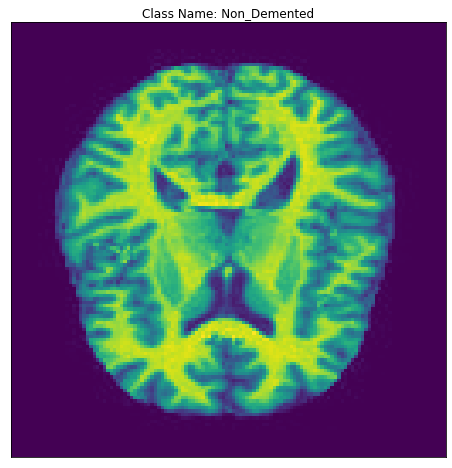

In [7]:
Non_Demented = random.choice(list(data_dir.glob("Non_Demented/*.jpg")))

plot(str(Non_Demented),"Non_Demented")

/content/drive/MyDrive/Dataset/Very_Mild_Demented/verymild_270.jpg


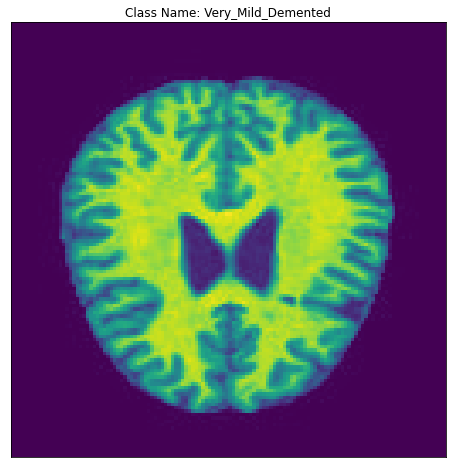

In [8]:
Very_Mild_Demented = random.choice(list(data_dir.glob("Very_Mild_Demented/*.jpg")))

plot(str(Very_Mild_Demented),"Very_Mild_Demented")

<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
            border-radius: 10px;">
<font size="4">
    We can see the difference between those classes even if some images have the same shame like a snack the model will perform well to predict the moderate demented because we can see very easily the difference between the moderate and the other one 
    </font>

</div>

<font size=5> Split the Dataset 🎬 </font>

In [9]:
batch_size = 32
img_height = 224
img_width = 224

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 5440 files belonging to 2 classes.
Using 4352 files for training.
Found 5440 files belonging to 2 classes.
Using 1088 files for validation.


<font size=5> Build the model 🏗 </font>
    
<div class="alert alert-block alert-info" 
     style="font-size:16px; font-family:Helvetica;
            border-radius: 10px;">
<font size="3">
    <b>Explanation</b>: We rescale the images to fit between [0,1] then for each convolutional layer we can see that the size increase 16-32-64 the parameter 3 is the kernel size often it's 3 but we can see 5 too we specify the padding as same this mean when the convolution occurs we put all around the image 0 pixels because when you are making convolution the kernel have to be in the center of all the pixels that it see, if we do not add padding it cannot convolute the edges so we will loose some information,The max pooling have a size of 2 by 2 matrix it parse the images and get the maximum value between 4 pixel and so on....  at the end we add a dropout layer to avoid overfit this will off some neurons randomly then we add a flatten layer to put all this in one dimensional array, the activation is relu except for the last layer that have to return us a probability of belonging to each class so the last layer have to have as neurons the number of classes 
    </font>

</div>

In [11]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    
   layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
    
  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation="softmax")
])

<font size=5> Compile the model 💿</font>

Difference between Sparse and Categorical: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiw66__1af3AhVHTBoKHQCYB7MQFnoECAQQAQ&url=https%3A%2F%2Fdatascience.stackexchange.com%2Fquestions%2F41921%2Fsparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy&usg=AOvVaw0fPR_3m2cNqRyLbT4kwDw0

In [12]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

<font size=5> Fit the model 🏋🏼 
    <b>92% Accuracy </b></font>

In [14]:
epochs = 9
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/9
136/136 [==============================] - 303s 2s/step - loss: 0.5410 - accuracy: 0.7160 - val_loss: 0.4875 - val_accuracy: 0.7748
Epoch 2/9
136/136 [==============================] - 215s 2s/step - loss: 0.4390 - accuracy: 0.7904 - val_loss: 0.3661 - val_accuracy: 0.8382
Epoch 3/9
136/136 [==============================] - 218s 2s/step - loss: 0.3424 - accuracy: 0.8449 - val_loss: 0.2697 - val_accuracy: 0.8943
Epoch 4/9
136/136 [==============================] - 215s 2s/step - loss: 0.2482 - accuracy: 0.8938 - val_loss: 0.2378 - val_accuracy: 0.9081
Epoch 5/9
136/136 [==============================] - 216s 2s/step - loss: 0.1901 - accuracy: 0.9189 - val_loss: 0.1508 - val_accuracy: 0.9467
Epoch 6/9
136/136 [==============================] - 215s 2s/step - loss: 0.1429 - accuracy: 0.9465 - val_loss: 0.1481 - val_accuracy: 0.9366
Epoch 7/9
136/136 [==============================] - 218s 2s/step - loss: 0.1253 - accuracy: 0.9536 - val_loss: 0.1269 - val_accuracy: 0.9485
Epoch 

<font size=5> Plot the result 📈  </font>

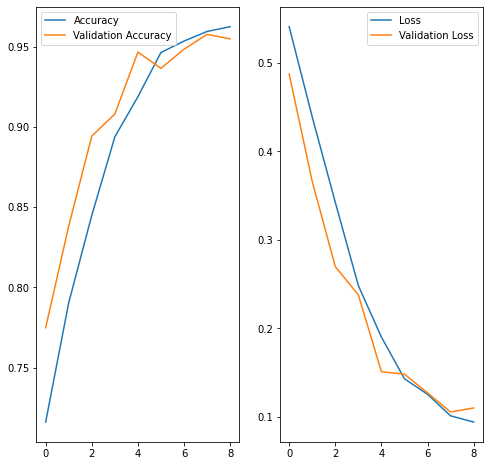

In [15]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

<font size=5> Predictions 🧙</font>

In [6]:
import numpy as np
import keras
import keras.utils as image
import tensorflow as tf


model = tf.keras.models.load_model('/content/drive/MyDrive/model2.hdf5')



# Load the image and preprocess it
img = image.load_img('/content/26 (62).jpg', target_size=(224,224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor/.255




# Make a prediction on the image
prediction = model.predict(img_tensor)

# Get the class with the highest probability

prediction = np.argmax(prediction)
prediction


1/1 [==============================] - 0s 105ms/step


0

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
